In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split


In [2]:
# Load the dataset
data = pd.read_csv("Cleaned-Life-Exp.csv")

# Display basic information and the first few rows
print(data.info())
data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   float64
 2   Status                           2938 non-null   float64
 3   Life expectancy                  2938 non-null   float64
 4   Adult Mortality                  2938 non-null   float64
 5   infant deaths                    2938 non-null   float64
 6   Alcohol                          2938 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2938 non-null   float64
 9   Measles                          2938 non-null   float64
 10  BMI                              2938 non-null   float64
 11  under-five deaths                2938 non-null   float64
 12  Polio               

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,1.621762,-0.459399,-0.443691,0.790238,0.268824,-1.133571,-0.335570,-0.635971,-0.110384,...,-3.268019,0.889486,-0.730578,-0.323445,-0.483546,0.343993,2.796805,2.757185,-0.704483,-0.563614
1,Afghanistan,1.404986,-0.459399,-0.979279,0.854614,0.285786,-1.133571,-0.334441,-0.755661,-0.168124,...,-1.048077,0.897493,-0.857092,-0.323445,-0.481553,-0.203706,2.864687,2.801550,-0.718710,-0.593391
2,Afghanistan,1.188210,-0.459399,-0.979279,0.830473,0.302749,-1.133571,-0.334594,-0.675868,-0.173531,...,-0.877312,0.877476,-0.772749,-0.323445,-0.480218,0.311126,2.909942,2.845914,-0.747164,-0.623168
3,Afghanistan,0.971434,-0.459399,-1.021286,0.862660,0.328193,-1.133571,-0.332096,-0.556178,0.032045,...,-0.663856,1.033609,-0.646235,-0.323445,-0.477539,-0.148469,2.955197,2.912461,-0.780360,-0.652944
4,Afghanistan,0.754658,-0.459399,-1.052791,0.886801,0.345155,-1.133571,-0.367862,-0.516281,0.051757,...,-0.621165,0.773387,-0.604064,-0.323445,-0.520044,-0.160246,3.023079,2.956826,-0.823042,-0.742275


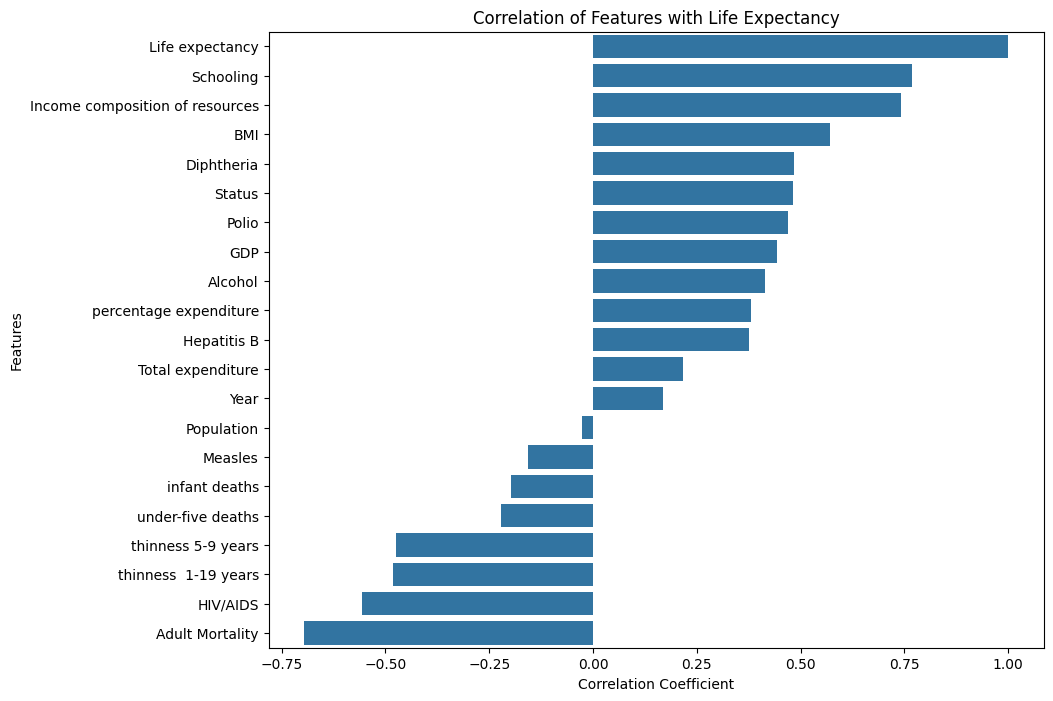

Life expectancy                    1.000000
Schooling                          0.767789
Income composition of resources    0.741218
BMI                                0.570549
Diphtheria                         0.484297
Status                             0.481376
Polio                              0.470382
GDP                                0.443216
Alcohol                            0.414547
percentage expenditure             0.381160
Name: Life expectancy, dtype: float64


In [6]:
# Calculate the correlation matrix
correlation_matrix = data.drop('Country', axis=1).corr()

# Extract correlations with respect to Life Expectancy
life_expectancy_corr = correlation_matrix["Life expectancy"].sort_values(ascending=False)

# Plot the correlations
plt.figure(figsize=(10, 8))
sns.barplot(x=life_expectancy_corr.values, y=life_expectancy_corr.index)
plt.title("Correlation of Features with Life Expectancy")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Features")
plt.show()

# Display top 10 features most correlated with life expectancy
print(life_expectancy_corr.head(10))


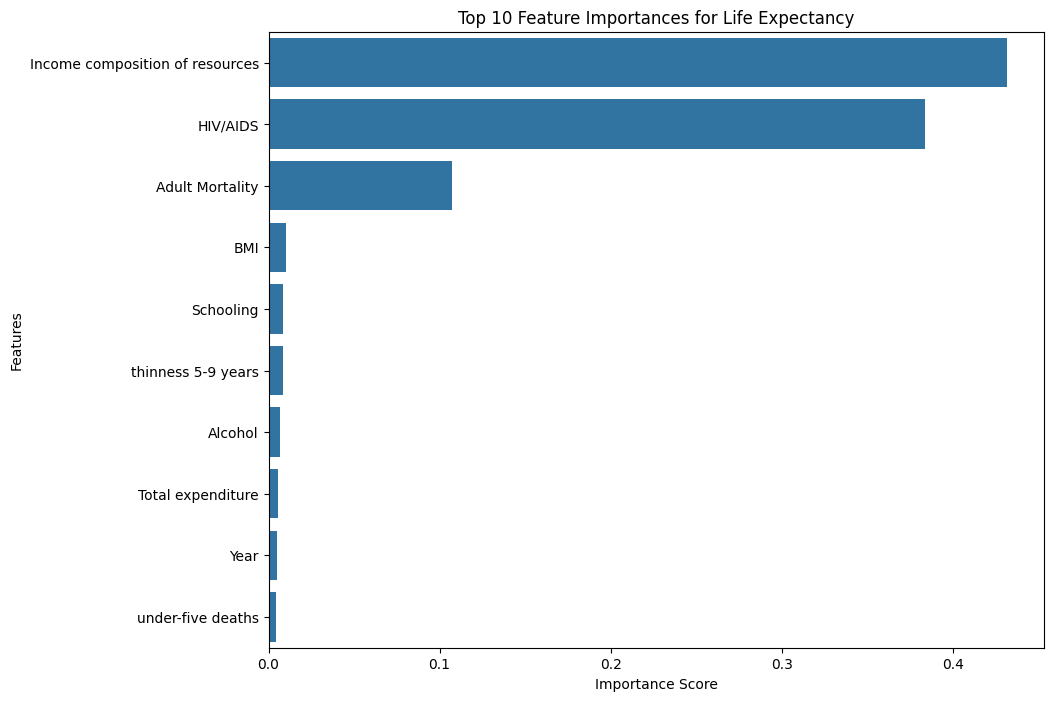

                            Feature  Importance
18  Income composition of resources    0.431411
13                         HIV/AIDS    0.383566
2                   Adult Mortality    0.107133
8                               BMI    0.010419
19                        Schooling    0.008681
17               thinness 5-9 years    0.008572
4                           Alcohol    0.006992
11                Total expenditure    0.005755
0                              Year    0.005204
9                 under-five deaths    0.004544


In [5]:
# Define the target and features
target = "Life expectancy"
features = data.drop(["Country", target], axis=1)

# Split the dataset into features (X) and target (y)
X = features
y = data[target]

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Calculate feature importances
importances = rf_model.feature_importances_

# Create a dataframe for feature importances
feature_importances_df = pd.DataFrame({"Feature": X.columns, "Importance": importances})
feature_importances_df = feature_importances_df.sort_values(by="Importance", ascending=False)

# Plot the top 10 most important features
plt.figure(figsize=(10, 8))
sns.barplot(x=feature_importances_df["Importance"].head(10), y=feature_importances_df["Feature"].head(10))
plt.title("Top 10 Feature Importances for Life Expectancy")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

# Display the top 10 most important features
print(feature_importances_df.head(10))
